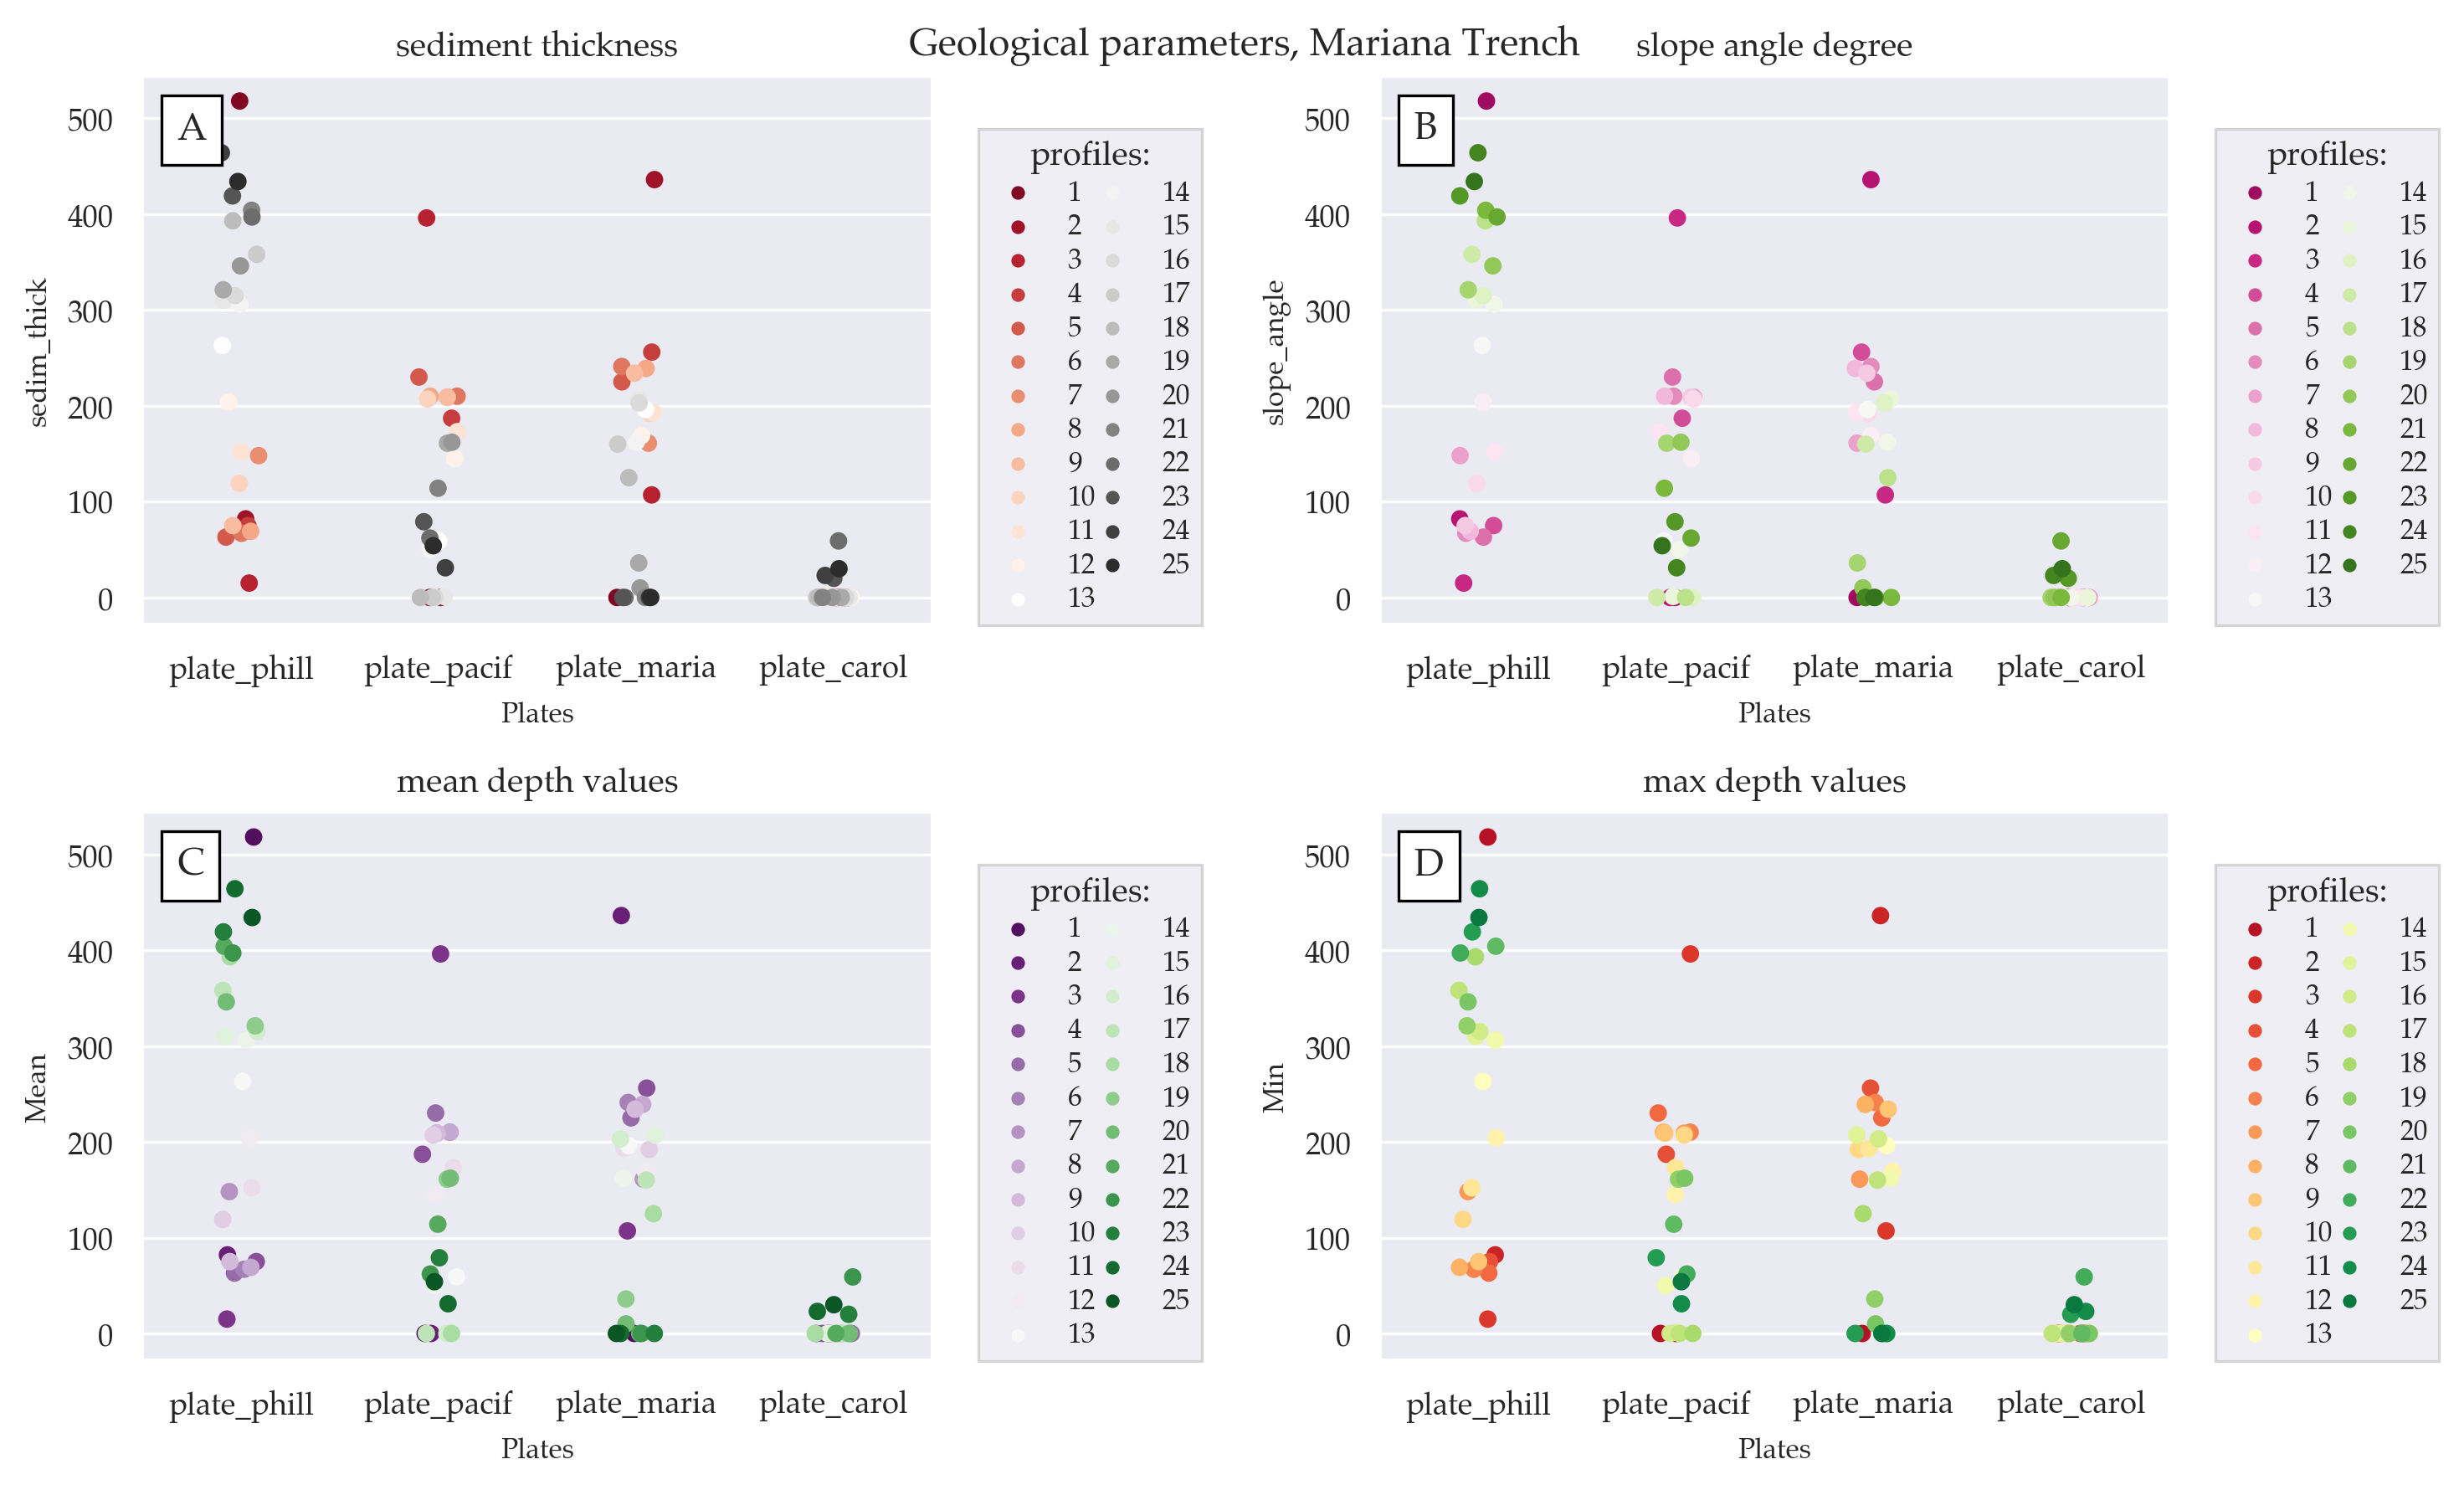

In [20]:
#!/usr/bin/env python
# coding: utf-8
import os
import pandas as pd
import matplotlib.pylab as pylab
from matplotlib import pyplot as plt
import matplotlib.artist as martist
from matplotlib.offsetbox import AnchoredText
import seaborn as sb

sb.set_style('darkgrid')
sb.set_context('paper')

os.chdir('/Users/pauline/Documents/Python')
dfM = pd.read_csv("Tab-Morph.csv")

# define 4 data frames for 4 subplots
df1 = dfM.melt(id_vars=['profile'], 
              value_vars=['plate_phill', 'plate_pacif', 'plate_maria', 'plate_carol'],
              var_name='Plates', value_name='sedim_thick')
df2 = dfM.melt(id_vars=['profile'], 
              value_vars=['plate_phill', 'plate_pacif', 'plate_maria', 'plate_carol'],
              var_name='Plates', value_name='slope_angle')
df3 = dfM.melt(id_vars=['profile'], 
              value_vars=['plate_phill', 'plate_pacif', 'plate_maria', 'plate_carol'],
              var_name='Plates', value_name='Mean')
df4 = dfM.melt(id_vars=['profile'], 
              value_vars=['plate_phill', 'plate_pacif', 'plate_maria', 'plate_carol'],
              var_name='Plates', value_name='Min')

params = {#'figure.figsize': (10, 7),
          'font.family': 'Palatino', 
          'axes.labelsize': 8,
          'legend.markerscale': .4,
          'legend.borderaxespad': -4.,
          'legend.labelspacing': .2, 
          'legend.fontsize': 8,
          'legend.fancybox': False,
         }
pylab.rcParams.update(params)

def add_at(ax, t, loc=2):
    fp = dict(size=11)
    _at = AnchoredText(t, loc=loc, prop=fp)
    ax.add_artist(_at)
    return _at

# define figure
fig = plt.figure(figsize=(10.0, 6.0), dpi=300) 
fig.suptitle('Geological parameters, Mariana Trench',
             fontsize=11, x=0.5, y=0.98)

# subplot 1
ax = fig.add_subplot(221)
sb.stripplot(x='Plates', y='sedim_thick', data=df1, 
             hue = 'profile', palette='RdGy', jitter=True
            )
plt.title('sediment thickness')
plt.legend(bbox_to_anchor=(1.2, .7), loc=1, ncol=2, 
           mode='expand', title='profiles:')
add_at(ax, "A")

# subplot 2
ax = fig.add_subplot(222)
sb.stripplot(x='Plates', y='slope_angle', data=df2, 
             hue = 'profile', palette='PiYG', jitter=True
            )
plt.title('slope angle degree')
plt.legend(bbox_to_anchor=(1.2, .7), loc=1, ncol=2, 
           mode='expand', title='profiles:')
add_at(ax, "B")

# subplot 3
ax = fig.add_subplot(223)
sb.stripplot(x='Plates', y='Mean', data=df3, 
             hue = 'profile', palette='PRGn', jitter=True
            )
plt.title('mean depth values')
plt.legend(bbox_to_anchor=(1.2, .7), loc=1, ncol=2, 
           mode='expand', title='profiles:')
add_at(ax, "C")

# subplot 4
ax = fig.add_subplot(224)
sb.stripplot(x='Plates', y='Min', data=df4, 
             hue = 'profile', palette='RdYlGn', jitter=True
            )
plt.title('max depth values')
plt.legend(bbox_to_anchor=(1.2, .7), loc=1, ncol=2, 
           mode='expand', title='profiles:')
add_at(ax, "D")

plt.subplots_adjust(top=0.85, bottom=0.15,
                    left=0.10, right=0.90,
                    hspace=0.25, wspace=0.2
                    )
#
plt.tight_layout()
fig.savefig('plot_Strip.png', dpi=300)
plt.show()